# Describtive analysis

#### Load namespaces

In [21]:
import pandas as pd
from utils import *
import pingouin as pg
from scipy.stats import ttest_ind

#### Load Data

In [25]:
dat = pd.read_csv('../data/merged_male.csv')

y_0 = dat['LZ']
dat = dat.drop(['TalentID', 'AK'], axis=1).reset_index(drop=True)
X_0 = dat.iloc[:,:-1]

group = 1                   # age class 'AK'
test_size = 0.2             # train-test split
# dat, X_0, y_0, _, _, _, _ = load_data(group=group,
#                                       test_size=test_size,
#                                       sub=True) # subjectives = True
dat = dat[['relative_age', 'height', 'weight', 'SL20', 'GW',
           'DR', 'BK', 'BJ', 'SKSC_TAK', 'SKSC_TEC', 'SKSC_KON', 'SKSC_PSY',
           'LZ']]
succ =  dat[dat['LZ']==1]
fail = dat[dat['LZ']==0]

## Description of the variables in the complete dataz

In [26]:
print('The data contains {0} players and {1} variables. {2} of which were successful'.format(dat.shape[0], dat.shape[1], dat[dat['LZ']==1].shape[0]))


The data contains 19177 players and 13 variables. 9305 of which were successful


In [28]:
dat[['relative_age', 'height', 'weight']].describe().iloc[[1,2,3,7], :]

,relative_age,height,weight
mean,158.649163,155.867323,40.185707
std,101.907279,10.209830,8.770663
min,1.000000,1.000000,24.500000
max,366.000000,200.000000,93.200000


In [29]:
dat[['SL20', 'GW', 'DR', 'BK', 'BJ']].describe().iloc[[1,2,3,7], :]

,SL20,GW,DR,BK,BJ
mean,3.553352,8.273919,10.858862,9.908495,3.864803
std,0.198211,0.409603,0.753594,1.353909,4.369862
min,2.810000,6.770000,8.560000,6.220000,0.000000
max,4.400000,10.000000,16.490000,19.650000,42.000000


In [30]:
dat[['SKSC_TAK', 'SKSC_TEC', 'SKSC_KON', 'SKSC_PSY']].describe().iloc[[1,2,3,7], :]

,SKSC_TAK,SKSC_TEC,SKSC_KON,SKSC_PSY
mean,1.527596,1.545132,1.791000,1.772210
std,0.587795,0.645015,0.749368,0.665725
min,0.000000,0.000000,0.000000,0.000000
max,3.000000,3.000000,3.000000,3.000000


In [31]:
dat[['LZ']].describe().iloc[[1,2,3,7], :]

,LZ
mean,0.485217
std,0.499794
min,0.000000
max,1.000000


## Hypotheses tests
We check in a multivariate test and in individual t-test the mean differences of successful and non-successful players.

### Multivariate t-test (Hotelling's T^2)

In [32]:
pg.multivariate_ttest(succ,fail)

,T2,F,df1,df2,pval
hotelling,8362.862833,642.894556,13,19163,0.0


### Individual t-tests



In [38]:
stat, p = ttest_ind(succ.iloc[:, 1:2],fail.iloc[:, 1:2])
test_result = np.transpose(succ.iloc[:, 1:2].describe().iloc[[1,2], :])
temp_0 = np.transpose(fail.iloc[:, 1:2].describe().iloc[[1,2], :])
test_result[['mean_0', 'std_0']] = temp_0
test_result["t-statistic"] = stat
test_result["p-value"] = p
for i in range(2, dat.iloc[:, 1::].shape[1]):
    stat, p = ttest_ind(succ[dat.columns[i]],fail[dat.columns[i]])
    temp = np.transpose(succ.iloc[:, i:(i+1)].describe().iloc[[1,2], :])
    temp_0 = np.transpose(fail.iloc[:, i:(i+1)].describe().iloc[[1,2], :])
    temp[['mean_0', 'std_0']] = temp_0
    temp["t-statistic"] = stat
    temp["p-value"] = p
    test_result = pd.concat([test_result,temp],axis=0)
    # test_result = test_result.append(temp)
    #print('For ', name, 'the test statistic is %.3f and p=%.3f' % (stat, p))
test_result

,mean,std,mean_0,std_0,t-statistic,p-value
height,155.520085,10.037495,156.194618,10.359502,-4.574890,4.794552e-06
weight,40.010795,8.469214,40.350573,9.042937,-2.681663,7.332000e-03
SL20,3.585616,0.195301,3.522941,0.196125,22.162230,1.774262e-107
GW,8.338206,0.407230,8.213324,0.402555,21.349859,5.695341e-100
DR,10.999887,0.758583,10.725936,0.724176,25.584847,5.391455e-142
BK,10.092770,1.392074,9.734805,1.293172,18.460147,1.946831e-75
BJ,3.211018,3.836162,4.481038,4.737395,-20.329779,6.367751e-91
SKSC_TAK,1.202134,0.468447,1.834366,0.519989,-88.281943,0.000000e+00
SKSC_TEC,1.271968,0.576042,1.802607,0.599024,-62.460087,0.000000e+00
SKSC_KON,1.488447,0.691818,2.076175,0.687141,-59.001972,0.000000e+00


In [43]:
descr = dat.iloc[:,:]
# descr.columns =['relative age', 'height', 'weight', 'sprint (20m)', 'agility','dribbling','ball control','juggling','tactical skills','kicking skills','endurance','psychological skills']
# print(round(descr.describe().iloc[1:3,:].transpose(),2).to_latex())
round(descr.describe().iloc[1:3,:].transpose(),2)

,mean,std
relative_age,158.65,101.91
height,155.87,10.21
weight,40.19,8.77
SL20,3.55,0.20
GW,8.27,0.41
DR,10.86,0.75
BK,9.91,1.35
BJ,3.86,4.37
SKSC_TAK,1.53,0.59
SKSC_TEC,1.55,0.65


## Plot

C:\Users\eduar\AppData\Local\Temp\ipykernel_29564\424219380.py:3: MatplotlibDeprecationWarning: Passing the notch parameter of boxplot() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  axs[0,0].boxplot([succ['relative_age'],fail['relative_age']],0,'',showmeans=bool_means, meanline=True)
C:\Users\eduar\AppData\Local\Temp\ipykernel_29564\424219380.py:7: MatplotlibDeprecationWarning: Passing the notch parameter of boxplot() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  axs[0,1].boxplot([succ['height'],fail['height']],0,'',showmeans=bool_means, meanline=True)
C:\Users\eduar\AppData\Local\Temp\ipykernel_29564\424219380.py:11: MatplotlibDeprecationWarning: Passing the notch parameter of boxplot() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  axs[0,2].boxplot([succ['weight'],fail['weight']],0,'',showmeans=bool_means, meanline=True)
C:\

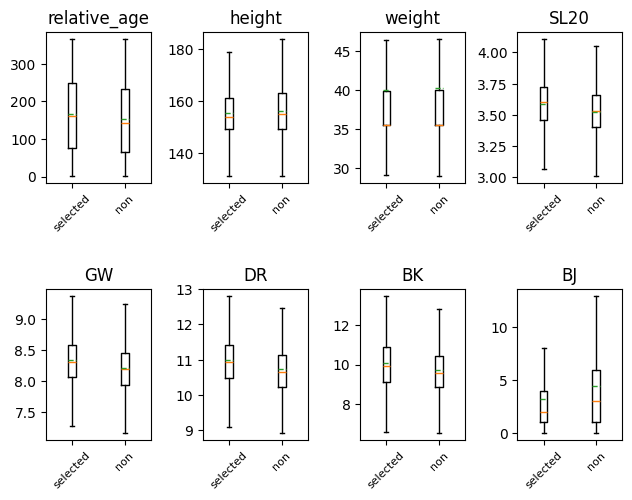

In [44]:
fig, axs = plt.subplots(2, 4)
bool_means = True
axs[0,0].boxplot([succ['relative_age'],fail['relative_age']],0,'',showmeans=bool_means, meanline=True)
axs[0,0].set_title('relative_age')
axs[0,0].set_xticklabels(['selected','non'],rotation=45, fontsize=8)

axs[0,1].boxplot([succ['height'],fail['height']],0,'',showmeans=bool_means, meanline=True)
axs[0,1].set_title('height')
axs[0,1].set_xticklabels(['selected','non'],rotation=45, fontsize=8)

axs[0,2].boxplot([succ['weight'],fail['weight']],0,'',showmeans=bool_means, meanline=True)
axs[0,2].set_title('weight')
axs[0,2].set_xticklabels(['selected','non'],rotation=45, fontsize=8)

axs[0,3].boxplot([succ['SL20'],fail['SL20']],0,'',showmeans=bool_means, meanline=True)
axs[0,3].set_title('SL20')
axs[0,3].set_xticklabels(['selected','non'],rotation=45, fontsize=8)

axs[1,0].boxplot([succ['GW'],fail['GW']],0,'',showmeans=bool_means, meanline=True)
axs[1,0].set_title('GW')
axs[1,0].set_xticklabels(['selected','non'],rotation=45, fontsize=8)

axs[1,1].boxplot([succ['DR'],fail['DR']],0,'',showmeans=bool_means, meanline=True)
axs[1,1].set_title('DR')
axs[1,1].set_xticklabels(['selected','non'],rotation=45, fontsize=8)

axs[1,2].boxplot([succ['BK'],fail['BK']],0,'',showmeans=bool_means, meanline=True)
axs[1,2].set_title('BK')
axs[1,2].set_xticklabels(['selected','non'],rotation=45, fontsize=8)

axs[1,3].boxplot([succ['BJ'],fail['BJ']],0,'',showmeans=bool_means, meanline=True)
axs[1,3].set_title('BJ')
axs[1,3].set_xticklabels(['selected','non'],rotation=45, fontsize=8)

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.7, wspace=0.5)


